In [1]:
import torch as t

In [7]:
#指定tensor形状
a = t.Tensor(2,3)
print(a)
b = t.Tensor([[1,2,3],[4,5,6],[6,7,8],[7,8,9]])
print(b)
print(b.tolist())

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [6., 7., 8.],
        [7., 8., 9.]])
[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [6.0, 7.0, 8.0], [7.0, 8.0, 9.0]]


In [11]:
b_size = b.size()
print(b_size)
print(b.numel()) #b中元素总个数 = b.nelement()
print(b.nelement())

torch.Size([4, 3])
12
12


In [14]:
c = t.Tensor(b_size)
d = t.Tensor((2,3))
print(c)
print(d)

tensor([[9.8091e-45, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])
tensor([2., 3.])


In [19]:
c.shape??

In [20]:
t.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [21]:
t.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [27]:
t.arange(1,6,2)

tensor([1, 3, 5])

In [28]:
t.linspace(1,10,3)

tensor([ 1.0000,  5.5000, 10.0000])

In [29]:
t.randn(2,3)

tensor([[ 0.8371, -0.6693, -0.6891],
        [-0.0553, -1.4578,  1.3571]])

In [30]:
t.randperm(5) #随机序列

tensor([3, 0, 1, 4, 2])

In [31]:
t.eye(6,10) #对角线为1

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [44]:
#调整形状，但元素总数一致
a = t.arange(0,6)
b = a.view(2,3)
print(a)
print(a.size())
print(b)
print(b.size())

tensor([0, 1, 2, 3, 4, 5])
torch.Size([6])
tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([2, 3])


In [ ]:
#两个tensor共享内存

In [37]:
b = a.view(-1,3) #-1维会自动计算大小
b

tensor([[0, 1, 2],
        [3, 4, 5]])

In [45]:
# 从0维起，对数据维度进行扩充。给指定位置加上维数为一的维度
#在第一维增加1
print(b.unsqueeze(1))
print(b.unsqueeze(1).size())

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])
torch.Size([2, 1, 3])


In [48]:
#在倒数第一维增加1
print(b.unsqueeze(-1))
print(b.unsqueeze(-1).size())

tensor([[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]]])
torch.Size([2, 3, 1])


In [50]:
c = b.view(1,1,1,2,3)
c

tensor([[[[[0, 1, 2],
           [3, 4, 5]]]]])

In [51]:
c.squeeze(0)

tensor([[[[0, 1, 2],
          [3, 4, 5]]]])

In [52]:
c.squeeze()#把所有维度为1的都压缩

tensor([[0, 1, 2],
        [3, 4, 5]])

In [53]:
a[1] = 100
b

tensor([[  0, 100,   2],
        [  3,   4,   5]])

In [55]:
#resize和view的区别是可以改变尺寸
#若新尺寸变小，之前的数据依旧会被保留
b.resize_(2,3)

tensor([[  0, 100,   2],
        [  3,   4,   5]])

In [56]:
b.resize_(3,2)

tensor([[  0, 100],
        [  2,   3],
        [  4,   5]])

In [57]:
b.resize_(1,3)

tensor([[  0, 100,   2]])

In [58]:
b.resize_(3,3)

tensor([[                  0,                 100,                   2],
        [                  3,                   4,                   5],
        [                  0,    -140514330973897, 8070450532247928832]])

In [60]:
a = t.randn(3,4)
a

tensor([[ 2.3308,  1.8162, -0.7299, -2.0944],
        [-0.6212, -1.6063,  0.0541, -0.4669],
        [-0.4743, -1.6187, -0.8182, -0.9161]])

In [67]:
a[0]

tensor([ 2.3308,  1.8162, -0.7299, -2.0944])

In [68]:
a[:,0]#第0列

tensor([ 2.3308, -0.6212, -0.4743])

In [69]:
a[0][2]

tensor(-0.7299)

In [70]:
a[:2]#前两行

tensor([[ 2.3308,  1.8162, -0.7299, -2.0944],
        [-0.6212, -1.6063,  0.0541, -0.4669]])

In [71]:
a>1

tensor([[1, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.uint8)

In [72]:
a[a>0]

tensor([2.3308, 1.8162, 0.0541])

gather

out[i][j] = input[index[i][j]][j] # dim=0 

out[i][j] = input[i][index[i][j]] # dim=1

In [84]:
a = t.arange(0,16).view(4,4)

In [78]:
#选取对角线上元素
index = t.LongTensor([[0,1,2,3]]) 
a.gather(0,index)

tensor([[ 0,  5, 10, 15]])

In [83]:
#选取反对角线上元素
index = t.LongTensor([[3,2,1,0]])
a.gather(1, index)

RuntimeError: Expected tensor [1, 4], src [4, 4] and index [1, 4] to have the same size apart from dimension 1

In [96]:
#选取反对角线上元素
index = t.LongTensor([[3,2,1,0]]).t() #转置
a.gather(1, index)

tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [97]:
index

tensor([[3],
        [2],
        [1],
        [0]])

In [81]:
index = t.LongTensor([[3,2,1,0]])
a.gather(0, index)

tensor([[12,  9,  6,  3]])

In [86]:
#选取两个对角线
index = t.LongTensor([[0,1,2,3],[3,2,1,0]]).t()
b = a.gather(1, index)
b

tensor([[ 0,  3],
        [ 5,  6],
        [10,  9],
        [15, 12]])

In [95]:
index

tensor([[0, 3],
        [1, 2],
        [2, 1],
        [3, 0]])

与gather对应的逆操作scatter_

In [93]:
c = t.zeros(4,4)
c.scatter_(1, index, b.float()).int()

tensor([[ 0,  0,  0,  3],
        [ 0,  5,  6,  0],
        [ 0,  9, 10,  0],
        [12,  0,  0, 15]], dtype=torch.int32)

### 高级索引
x操作结果一般不和原始的Tenso共享内存

In [99]:
x = t.arange(0,27).view(3,3,3)
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [105]:
a = t.Tensor(2,3)
b = a.int()

In [104]:
a.dtype

torch.float32

In [106]:
b.dtype

torch.int32

In [107]:
c = a.type_as(b)
c.dtype

torch.int32

In [108]:
d = b.new(3,4)
d.dtype

torch.int32

In [110]:
b = t.ones(2,3)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [114]:
b.sum(dim=0,keepdim=False)

tensor([2., 2., 2.])

In [115]:
b = a.t()

In [116]:
a

tensor([[1.4013e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [117]:
b

tensor([[1.4013e-44, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])

In [118]:
b.is_contiguous()

False

In [119]:
b.contiguous()

tensor([[1.4013e-44, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])

#### 当遇到Tensor不支持的操作时，可先转成Numpy数组，处理后再转回tensor，转换开销很小

In [120]:
import numpy as np
a = np.ones([2,3],dtype=np.float32)
a

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [122]:
b = t.from_numpy(a)
print(b,b.dtype)

tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.float32


In [123]:
b = t.Tensor(a)
print(b,b.dtype)

tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.float32


In [125]:
a[0,1]=100
print(a)
print(b)

[[  1. 100.   1.]
 [  1.   1.   1.]]
tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]])


In [126]:
c = b.numpy()

In [127]:
# a b c 共享内存

#### Broadcast

在2个不同的矩阵运算过程中，Numpy将较小的数组拉伸成较大数组的形状(shape)，然后Numpy加减乘除不同矩阵的加减乘除运算
Pytorch支持自动广播

In [131]:
a = t.arange(6).resize_(3,2)
b = t.arange(6).resize_(2,3,1)
print(a)
print(b)

tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]]])


In [132]:
a+b

tensor([[[ 0,  1],
         [ 3,  4],
         [ 6,  7]],

        [[ 3,  4],
         [ 6,  7],
         [ 9, 10]]])

In [133]:
a.unsqueeze(0).expand(2,3,2)+b.expand(2,3,2)

tensor([[[ 0,  1],
         [ 3,  4],
         [ 6,  7]],

        [[ 3,  4],
         [ 6,  7],
         [ 9, 10]]])

使用t.contiguous将数据变连续后，会复制到新的内存，不在与原来的数据共享storage

## 线性回归

In [135]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display


In [136]:
t.manual_seed(1000)

def get_fake_data(batch_size=8):
    # 产生随机数据y=x*2+3，加上噪声
    x = t.rand(batch_size,1)*20
    y = x*2 +(1+t.randn(batch_size,1))*3 #噪音为正态分布
    return x,y

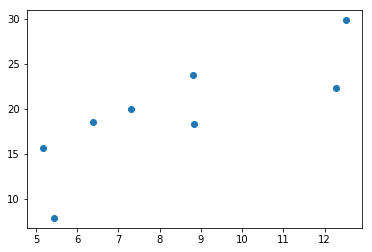

In [137]:
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())

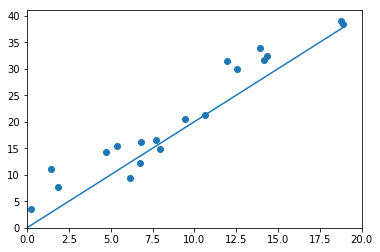

2.2141225337982178 0.0


In [146]:
#随机初始化参数
w = t.rand(1,1)
b = t.zeros(1,1)
lr = 0.001

for ii  in range(20000):
    x,y = get_fake_data()
    
    #forward:
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5*(y_pred-y)**2
    loss = loss.sum()
    
    #backward:
    dloss = 1
    dy_pred = dloss * (y_pred-y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    #update
    w.sub_(lr*dw)
    w.sub_(lr*db)
    
    if ii%1000==0:
        #画图
        display.clear_output(wait=True)
        x = t.arange(0,20).view(-1,1)
        y = x.mm(w.long()).float() + b.expand_as(x)
#         y = x.mm(w.long()).float()
#         y += b.expand_as(x)
        plt.plot(x.numpy(),y.numpy()) #predicted
        
        x2,y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(),y2.numpy()) #true data
        
        plt.xlim(0,20)
        plt.ylim(0,41)
        plt.show()
        plt.pause(0.5)
        print(w.squeeze().item(),b.squeeze().item())